In [1]:
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

mpl.rcParams['figure.dpi'] = 300

In [2]:
M_list = [12, 14, 16, 18]

In [3]:
sim = pd.read_csv('cancer_sim.csv', header=None).T
sim.columns = M_list
sim.index = M_list
sim

,12,14,16,18
12,0.645,0.572,0.554,0.555
14,0.615,0.520,0.510,0.504
16,0.543,0.510,0.448,0.429
18,0.544,0.495,0.437,0.411


In [4]:
sensei = pd.read_csv('cancer_sensei.csv', header=None).T
sensei.columns = M_list
sensei.index = M_list
sensei

,12,14,16,18
12,0.66396,0.63051,0.61108,0.59862
14,0.61821,0.56681,0.53453,0.51237
16,0.58986,0.52488,0.48276,0.45315
18,0.57076,0.49514,0.44530,0.40987


In [5]:
baseline = pd.read_csv('cancer_baseline.csv', header=None).T
baseline.columns = M_list
baseline.index = M_list
baseline

,12,14,16,18
12,0.65952,0.62571,0.60607,0.59348
14,0.61303,0.56117,0.52863,0.50632
16,0.58420,0.51871,0.47634,0.44659
18,0.56477,0.48861,0.43854,0.40301


In [6]:
(sim - sensei).apply(lambda x: x ** 2).mean().mean() ** .5

0.03241530184573331

In [7]:
(sim - baseline).apply(lambda x: x ** 2).mean().mean() ** .5

0.028243587103978132

In [8]:
((sim - sensei).abs() / sim).apply(lambda x: x ** 2).mean().mean() ** .5

0.06078445575782288

In [9]:
((sim - baseline).abs() / sim).apply(lambda x: x ** 2).mean().mean() ** .5

0.052645793042328616

In [10]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

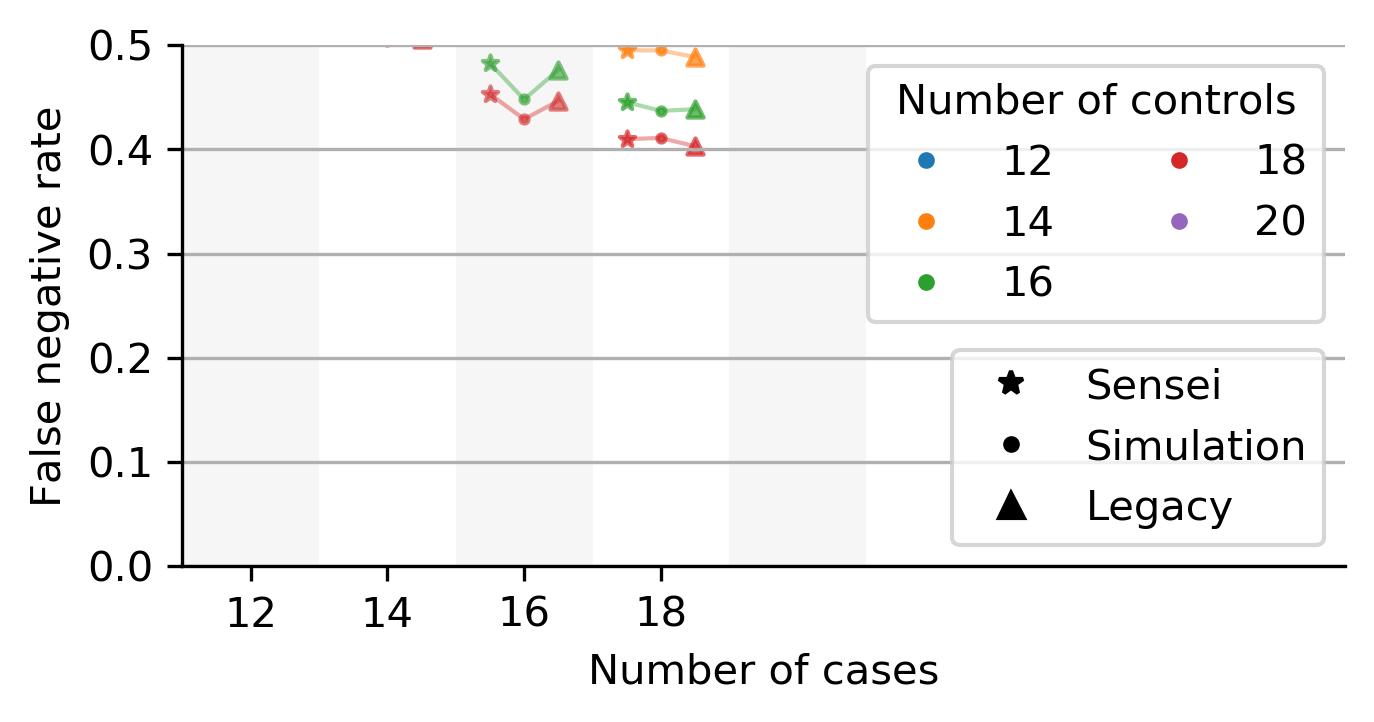

In [11]:
markersize = 15

color_map = {
 12: colors[0],
 14: colors[1],
 16: colors[2],
 18: colors[3],
 20: colors[4]
}

fig = plt.figure(figsize=(5, 2.3))
ax = fig.add_subplot(1, 1, 1)

for i in M_list:
    for j in M_list:
        x = [i - 0.5, i + 0.0, i + 0.5]
        y = [sensei.loc[i, j], sim.loc[i, j], baseline.loc[i, j]]
        ax.plot(x, y, lw=1, c=color_map[j], alpha=0.4)
        ax.scatter(x[0], y[0], marker='*', color=color_map[j], s=markersize, alpha=0.7)
        ax.scatter(x[1], y[1], marker='.', color=color_map[j], s=markersize, alpha=0.7)
        ax.scatter(x[2], y[2], marker='^', color=color_map[j], s=markersize, alpha=0.7)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

current_ylim = ax.get_ylim()
for v in range(12, 21):
    if v % 4 == 0:
        ax.fill_between([v - 1, v + 1], 0, 1, facecolor='lightgray', alpha=0.2)

ax.set_ylim([0.0, 0.5])
ax.set_xticks(M_list)
ax.tick_params(axis='x', which = 'both', labelbottom=None)
ax.set_ylabel('False negative rate')
ax.set_xlabel('Number of cases')
ax.set_xlim(11, 28)
    
# Ticks
ax.tick_params(axis='x', which = 'both', labelbottom=True)
#ax.set_xticks(list(i + 0.5 for i in list(x_map.values())))
#ax.set_xticklabels(list(cell_types_cosmetic_dict_short[i] for i in list(x_map.keys())), rotation=30, ha='right')

legend_elements = [mpl.lines.Line2D([0], [0], marker='.', color=color_map[i], linestyle="None", label=i) for i in color_map]

leg1 = ax.legend(handles=legend_elements, loc='upper right', title = 'Number of controls', ncol=2)

legend_elements = [mpl.lines.Line2D([0], [0], marker='*', color='k', linestyle="None", label='Sensei'),
                   mpl.lines.Line2D([0], [0], marker='.', color='k', linestyle="None", label='Simulation'),
                   mpl.lines.Line2D([0], [0], marker='^', color='k', linestyle="None", label='Legacy')]

ax.legend(handles=legend_elements, loc='lower right')
ax.add_artist(leg1)


ax.grid(axis='y', which='both')